### Question 1
1. If you are rolling 3 dice, determine the probability that the sum of the faces showing up is not equal to 12.
---



In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Function to roll a 6 sided dice
def rollDice():
  return random.randint(1, 6)

In [ ]:
#Function that rolls dice 3 times
#Returns the total sum of results
def roll3():
  rolls = 0
  rolls += rollDice()
  rolls += rollDice()
  rolls += rollDice()
  return rolls

In [ ]:
#Calculating the probability that the sum of 3 dice rolls is not 12
dice = []
prob = []
for i in range(10000):
  dice.append(roll3())
  prob.append(sum(np.array(dice) != 12)/(i + 1))

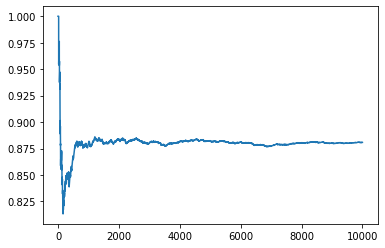

In [ ]:
#Plotting the results of monte carlo simulation
plt.plot(prob)
plt.show()

In [ ]:
sum(np.array(dice) != 12)/(10000)
#Around 88% probability to not get 12

0.8808

###Question 2
2. You're about to get on a plane to Boston. You want to know whether it is raining. You call 4 random friends of yours who live there and ask each one independently, if it's raining. The first two of your friends have a 2/3 chance of telling you the truth and, the other two have 1/5 chance of messing with you by lying. All 4 friends tell you that "No" it isn't raining. What is the probability that it's raining somewhere in Boston?

In [ ]:
#Start by finding the probabilities of each friend lying

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Lie is given is supposed to be given as a number between 1 - 100 that signifies the chance the friend will lie
def friend(lie):
  chance = random.randint(1, 100)
  if(chance < lie): #if the randomly generated chance is within the threshold for a lie
    return False #False for lying
  return True

In [ ]:
#Function that assigns a 50 50 chance for each friend to answer yes or no.
#Only the circumstances where all friends answer no will the counter return
def getNos():
  nos = []; counter = 0
  while(True):
    nos.clear(); counter += 1
    for i in range(4):
      nos.append(random.choice([True, False]))
    if(nos[0] == False and nos[1] == False and nos[2] == False and nos[3] == False):
      break
  return counter

In [ ]:
getNos()

1

In [ ]:
#Raining or not in each person's location
def raining():
  rain = []
  for i in range(4):
    rain.append(random.choice([True, False]))
  return rain

In [ ]:
raining()

[True, True, False, False]

In [ ]:
#Calculates the chances of lying compared to whether an area is raining or not
def calcLie(raining):
  lies = []
  lies.append(friend(33)); lies.append(friend(33)) #First two friends
  lies.append(friend(20)); lies.append(friend(20)) #Second two friends
  if(((lies[0] == False and raining[0] == True) or (lies[1] == False and raining[1] == True) or (lies[2] == False and raining[2] == True) or (lies[3] == False and raining[3] == True))):
    return True #It is raining somwhere in Boston / someone is lying
  return False

In [ ]:
calcLie(raining())

False

In [ ]:
#Determines how many times it takes for there to have one friend lie and it be raining in that area
def countLie():
  counter = 0
  while(True):
    counter += 1
    if(calcLie(raining()) == True):
      break
  return counter

In [ ]:
countLie()

1

In [ ]:
#Calculating the probability that all 4 friends will answer no and at least 1 will lie
lies = []
prob = []
for i in range(10000):
  lies.append(1 / countLie())
  prob.append(sum(np.array(lies))/(i + 1))

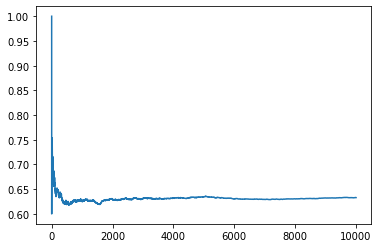

In [ ]:
#Plotting the results of monte carlo simulation
plt.plot(prob)
plt.show()

In [ ]:
sum(np.array(lies))/(10000)
#Around a 63% chance that someone is lying and that it is raining in Boston

0.6330666498778874

### Question 3

3. Mad Max wants to travel from New York to Dallas by the shortest possible route. He may travel over the routes shown in the table below. Unfortunately, the Wicked Witch can block one road leading out of Atlanta and one road leading out of Nashville. Mad Max will not know which roads have been blocked until he arrives at Atlanta or Nashville. Should Mad Max start toward Atlanta or Nashville?

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#NY - AT - SL - DAL = 2083
#NY - AT - NO - DAL = 1841
#NY - NA - SL - DAL = 1831
#NY - NA - NO - DAL = 1937

In [ ]:
#Possible paths (miles)
paths = [2083, 1841, 1831, 1937]
#Possible paths blocked, only one for each 'na' or 'at'
blocked = {'naSL' : 309, 'naNO' : 532, 'atSL' : 555, 'atNO' : 470}

In [ ]:
#Generates random number to simulate witch choosing which path to block
def randPath():
  nash = random.randint(1, 2)
  atl = random.randint(1, 2)
  return nash, atl

In [ ]:
print(randPath())

(1, 1)


The best route to take is towards Nashville  0.7469  of the time it is better than Atlanta


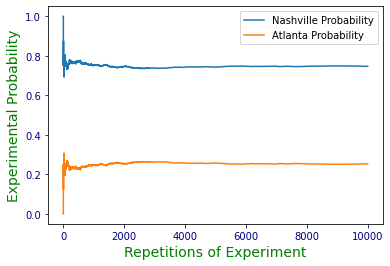

In [ ]:
atProb = []
nashProb = []

def monteCarlo():
  atWin = 0; nashWin = 0
  path = ()
  pathAt = 0; pathNash = 0
  for i in range(10000):
    path = randPath()
    if(path[0] == 1):
      pathNash = 1937
    else:
      pathNash = 1831
    if(path[1] == 1):
      pathAt = 1841
    else:
      pathAt = 2083
    if(pathNash < pathAt):
      nashWin += 1
    if(pathAt < pathNash):
      atWin += 1

    atProb.append(atWin/(i+1))
    nashProb.append(nashWin/(i+1))
  plt.plot(nashProb,label='Nashville Probability')
  plt.plot(atProb, label='Atlanta Probability')
  plt.tick_params(axis='x', colors='navy')
  plt.tick_params(axis='y', colors='navy')
  plt.xlabel('Repetitions of Experiment',fontsize=14,color='green')
  plt.ylabel('Experimental Probability',fontsize=14,color='green')
  plt.legend()
  print('The best route to take is towards Nashville ', nashProb[-1], ' of the time it is better than Atlanta')
monteCarlo()